<a href="https://colab.research.google.com/github/senith-sulara/ML_Assignment2_IT19095240_IT19143828_IT18000818_IT19021058/blob/FinalFile/HeartDiseaseFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [4]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#import Dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/Heart_Disease_Prediction.csv')

In [8]:
#View Data
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
#convert string data to integer
heart_mapping = {'Presence': 1, 'Absence': 0}
data['Heart Disease'] = data['Heart Disease'].map(heart_mapping)

In [11]:
#After mapping data
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


Missing values

In [12]:
#Finding Null Values
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [13]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('missing values rows ', count)

missing values rows  0


The dataset has no null values.

#Data Analysis and Visualization

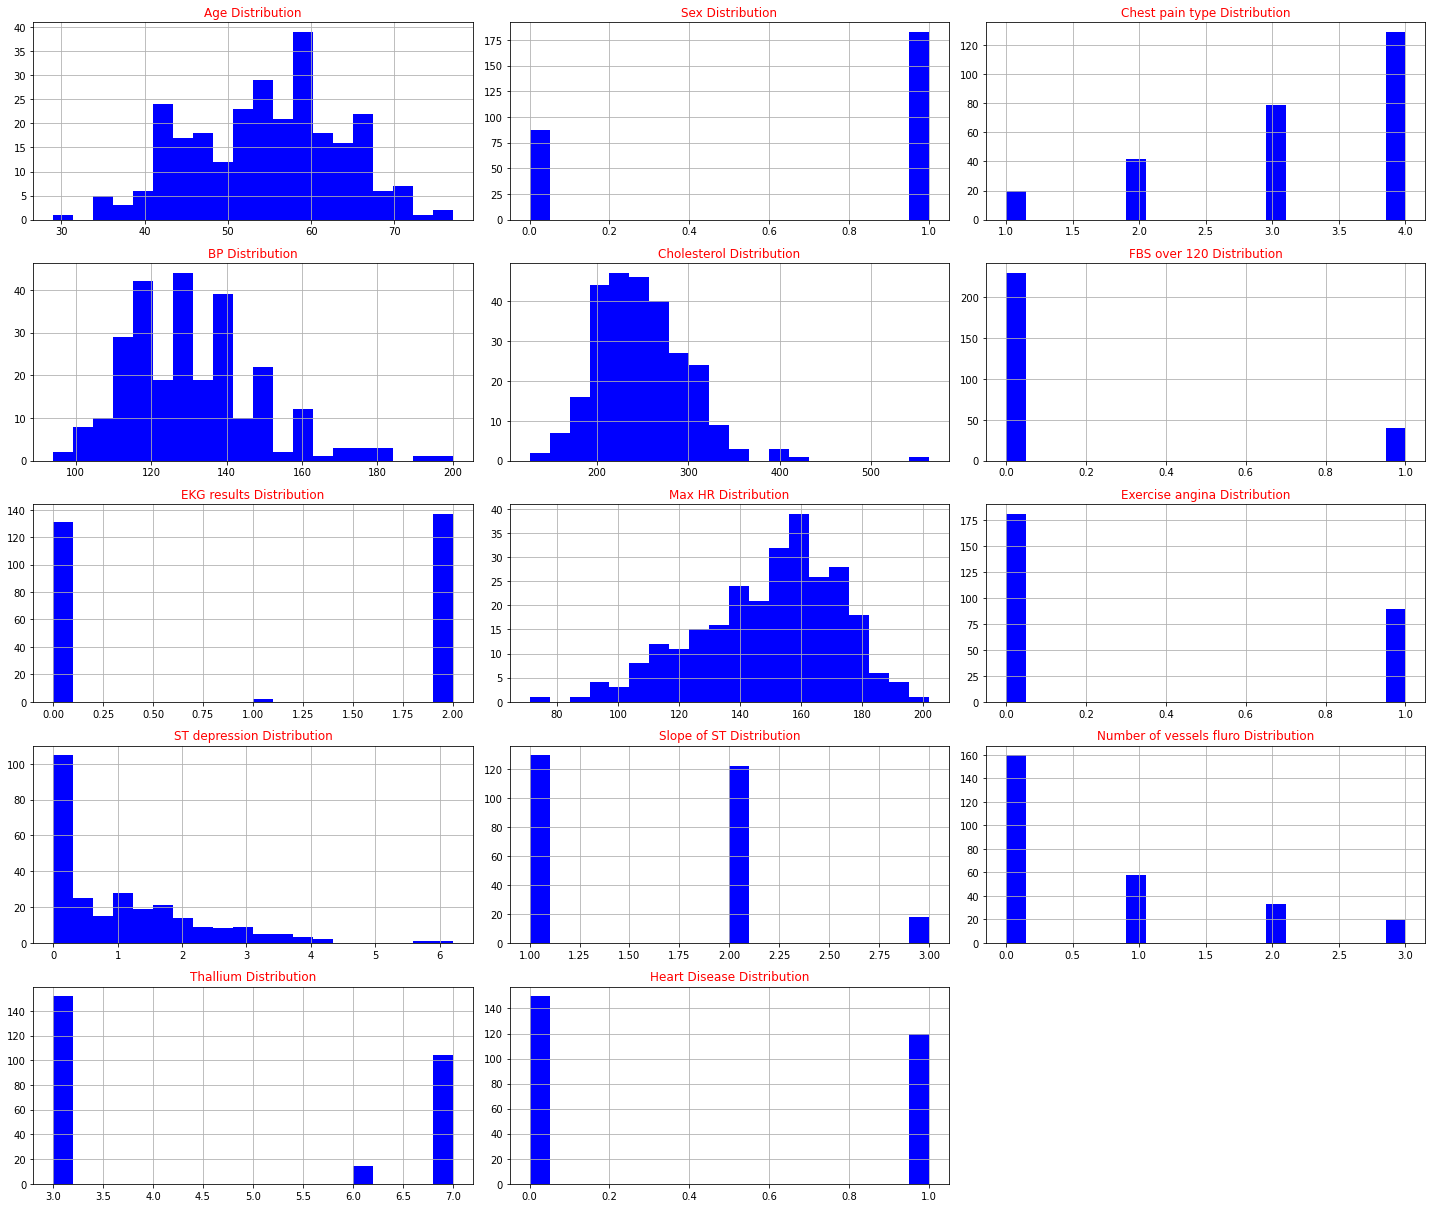

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title(feature+" Distribution",color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(data, 
             x='Heart Disease', 
             color='Sex', 
             title='Heart Disease vs Age')

There are 20 Female patents and 100 Male patents with the heart disease

In [ ]:
import seaborn as sn

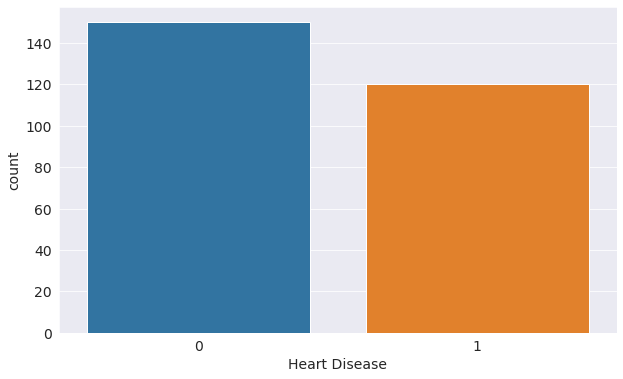

In [ ]:
sn.countplot(x='Heart Disease',data=data)

There are over 140 patents that are free of heart disease and 120 patents that have heart disease.

#Training and Test Sets

In [14]:
x = data.iloc[:, :-1]

y = data.iloc[:, -1]

print(x)
print(y)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

Splitting data to train and test split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
# 80% of the data is spent on training and 20% on testing.

In [16]:
print('x_train.shape :', x_train.shape)
print('x_test.shape :', x_test.shape)

x_train.shape : (216, 13)
x_test.shape : (54, 13)


In [17]:
x_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
35,48,1,4,130,256,1,2,150,1,0.0,1,2,7
111,41,1,2,110,235,0,0,153,0,0.0,1,0,3
229,52,1,1,118,186,0,2,190,0,0.0,2,0,6
102,49,0,4,130,269,0,0,163,0,0.0,1,0,3
139,57,1,4,132,207,0,0,168,1,0.0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,42,1,2,120,295,0,0,162,0,0.0,1,0,3
193,35,1,4,126,282,0,2,156,1,0.0,1,0,7
165,64,0,4,180,325,0,0,154,1,0.0,1,0,3
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7


In [ ]:
x_test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
197,54,0,3,110,214,0,0,158,0,1.6,2,0,3
18,64,1,1,110,211,0,2,144,1,1.8,2,0,3
126,62,1,4,120,267,0,0,99,1,1.8,2,2,7
209,37,1,3,130,250,0,0,187,0,3.5,3,0,3
46,49,1,3,118,149,0,2,126,0,0.8,1,3,3
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3
187,52,1,4,108,233,1,0,147,0,0.1,1,3,7
146,52,1,4,112,230,0,0,160,0,0.0,1,1,3
118,66,0,1,150,226,0,0,114,0,2.6,3,0,3
173,68,0,3,120,211,0,2,115,0,1.5,2,0,3


#Training a Logistic Regression Model

In [18]:
model = LogisticRegression(solver='liblinear')# libliner is for large datasets 
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

We utilized libliner since the total number of iterations in the data collection had reached its maximum.

In [19]:
print(model.coef_.tolist())

[[-0.0618979961246254, 0.7253022317054735, 0.8527165173885325, 0.022198558603237772, 0.004144628548857107, -0.3094976434428736, 0.4450930250667726, -0.051898987624715114, 0.7918958797039567, 0.13209530860528904, 0.03168054128647893, 1.4736136096148686, 0.5390887908535893]]


In [20]:
print(model.intercept_)

[-0.63898274]


confusion matrix for training

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
def pre_confusion_matrix(inputs, targets, name=''):
    predicts = model.predict(inputs)
    
    accu = accuracy_score(targets, predicts)
    print("Accuracy: {:.2f}%".format(accu * 100))
    
    conf = confusion_matrix(targets, predicts, normalize='true')
    plt.figure()
    sns.heatmap(conf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return predicts

Accuracy: 90.74%


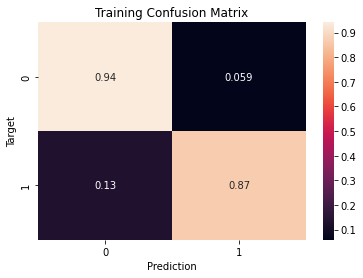

In [23]:
disp = pre_confusion_matrix(x_train, y_train, 'Training')

#Predictions and Evaluating the Model

In [24]:
train_preds = model.predict(x_train)

In [25]:
train_preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [26]:
train_probs = model.predict_proba(x_train)
train_probs
#predict_proba returns a probabilistic prediction.

array([[8.05651776e-03, 9.91943482e-01],
       [9.73962484e-01, 2.60375162e-02],
       [9.89667316e-01, 1.03326843e-02],
       [9.55680075e-01, 4.43199250e-02],
       [5.90173906e-01, 4.09826094e-01],
       [9.03799358e-01, 9.62006418e-02],
       [1.31493246e-03, 9.98685068e-01],
       [9.87865432e-01, 1.21345678e-02],
       [6.30992259e-01, 3.69007741e-01],
       [2.40302409e-02, 9.75969759e-01],
       [9.80397335e-01, 1.96026649e-02],
       [1.73473779e-01, 8.26526221e-01],
       [2.28031711e-02, 9.77196829e-01],
       [9.67030526e-01, 3.29694744e-02],
       [2.92316857e-02, 9.70768314e-01],
       [9.92427233e-01, 7.57276688e-03],
       [6.29673272e-01, 3.70326728e-01],
       [1.07218465e-03, 9.98927815e-01],
       [6.00545491e-02, 9.39945451e-01],
       [3.73447418e-01, 6.26552582e-01],
       [9.33833194e-01, 6.61668063e-02],
       [9.13460015e-02, 9.08653999e-01],
       [1.45275236e-01, 8.54724764e-01],
       [9.38194583e-01, 6.18054172e-02],
       [7.945137

In [27]:
model.classes_

array([0, 1])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_train, train_preds)#prediction accuracy of the model

0.9074074074074074

In [30]:
confusion_matrix(y_train, train_preds)

array([[112,   7],
       [ 13,  84]])

In [31]:
def predict_confusion_matrix(inputs, targets, name=''):
    predicts = model.predict(inputs)
    
    accu = accuracy_score(targets, predicts)
    print("Accuracy: {:.2f}%".format(accu * 100))
    
    conf = confusion_matrix(targets, predicts, normalize='true')
    plt.figure()
    sns.heatmap(conf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return predicts

Accuracy: 75.93%


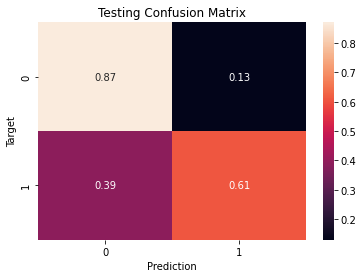

In [32]:
disp = predict_confusion_matrix(x_test, y_test, 'Testing')

In [ ]:
confusion_matrix(y_test, y_test)

array([[31,  0],
       [ 0, 23]])

In [ ]:
predictions = model.predict(x_test) #predict
print(predictions)

print(y_test)

print(classification_report(y_test, predictions))

print(accuracy_score(y_test, predictions))

[0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0]
197    0
18     0
126    1
209    0
46     1
251    0
187    0
146    1
118    0
173    0
150    0
112    1
13     1
253    0
188    0
11     0
3      0
169    1
164    0
37     1
179    0
103    1
54     0
49     1
234    0
233    1
170    0
53     0
23     0
264    1
39     0
65     1
127    0
29     0
90     0
228    0
160    1
62     0
85     0
239    0
59     1
137    1
42     0
222    0
168    0
191    1
142    1
231    1
9      1
257    1
0      1
194    0
69     1
177    1
Name: Heart Disease, dtype: int64
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        31
           1       0.78      0.61      0.68        23

    accuracy                           0.76        54
   macro avg       0.76      0.74      0.74        54
weighted avg       0.76      0.76      0.75        54

0.7592592592592593


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
#confusion matrix for y_test and predictions

[[27  4]
 [ 9 14]]


#Predictions on a Single Input

Input new data

In [ ]:
newinput = {'Age': 55,	'Sex': 1,	'Chest pain type': 1,	'BP': 140,	'Cholesterol': 200,	'FBS over 120': 0,	'EKG results': 2,'Max HR': 180,	'Exercise angina': 0,	'ST depression':0,	'Slope of ST': 1,	'Number of vessels fluro': 0,	'Thallium': 3}

convert data to a dataframe in pandas

In [ ]:
newinput_df = pd.DataFrame([newinput])

In [ ]:
newinput_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,55,1,1,140,200,0,2,180,0,0,1,0,3


In [ ]:
predictions = model.predict(newinput_df) #prediction
print(predictions)

[0]


second data row

In [ ]:
newinput_1 = {'Age': 57,	'Sex': 0,	'Chest pain type': 4,	'BP': 140,	'Cholesterol': 525,	'FBS over 120': 1,	'EKG results': 1,'Max HR': 170,	'Exercise angina': 0,	'ST depression':2.3,	'Slope of ST': 2,	'Number of vessels fluro': 1,	'Thallium': 7}

In [ ]:
newinput_1_df = pd.DataFrame([newinput_1])

In [ ]:
newinput_1_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,57,0,4,140,525,1,1,170,0,2.3,2,1,7


In [ ]:
predictions_1 = model.predict(newinput_1_df) 
print(predictions_1)

[1]
